[![Lab Documentation and Solutions](https://img.shields.io/badge/Lab%20Documentation%20and%20Solutions-purple)](https://mongodb-developer.github.io/vector-search-lab/)

# Step 1: Setup prerequisites

In [74]:
import os
import sys
from pymongo import MongoClient

# Add parent directory to path to import from utils
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))
from utils import track_progress, set_env

In [75]:
# If you are using your own MongoDB Atlas cluster, use the connection string for your cluster here
MONGODB_URI = os.getenv("MONGODB_URI")
# Initialize a MongoDB Python client
mongodb_client = MongoClient(MONGODB_URI)
# Check the connection to the server
mongodb_client.admin.command("ping")

{'ok': 1.0,
 '$clusterTime': {'clusterTime': Timestamp(1772051455, 1),
  'signature': {'hash': b'\xca\xcf\x89P\xe9\xbe0\x0e\xe2\xc6$t~\x1f/\xb5_\xb3\xda\xa7',
   'keyId': 7610876245458288646}},
 'operationTime': Timestamp(1772051455, 1)}

In [76]:
# Track progress of key steps-- DO NOT CHANGE
track_progress("cluster_creation", "ai_vs_lab")

Tracking progress for task cluster_creation


In [ ]:
# Set the passkey provided by your workshop instructor
PASSKEY = "replace-with-passkey"

In [78]:
# Obtain a Voyage API key from our AI model proxy and set it as an environment variable-- DO NOT CHANGE
set_env(["voyageai"], PASSKEY)

Successfully set VOYAGE_API_KEY environment variable.


# Step 2: Import data into MongoDB

In [79]:
import json

### **Do not change the values assigned to the variables below**

In [80]:
# Database name
DB_NAME = "mongodb_genai_devday_vs"
# Collection name
COLLECTION_NAME = "books"
# Name of the vector search index
ATLAS_VECTOR_SEARCH_INDEX_NAME = "vector_index"

In [81]:
# Connect to the `COLLECTION_NAME` collection.
collection = mongodb_client[DB_NAME][COLLECTION_NAME]

In [82]:
with open("../data/books.json", "r") as data_file:
    json_data = data_file.read()

data = json.loads(json_data)

print(f"Deleting existing documents from the {COLLECTION_NAME} collection.")
collection.delete_many({})
collection.insert_many(data)
print(
    f"{collection.count_documents({})} documents ingested into the {COLLECTION_NAME} collection."
)

Deleting existing documents from the books collection.
20 documents ingested into the books collection.


# Step 3: Generating embeddings

In [83]:
from PIL import Image
import requests
import voyageai

In [84]:
# Initialize the Voyage AI client
vo = voyageai.Client()

### For images

📚 https://docs.voyageai.com/docs/multimodal-embeddings#python-api (See the Example)

In [85]:
image_url = "https://images.isbndb.com/covers/4318463482198.jpg"
# Load the image from the URL above
image = Image.open(requests.get(image_url, stream=True).raw)
# Use the `multimodal_embed` method of the Voyage AI API with the following arguments to embed the image:
# inputs: The image wrapped in a list of lists
# model: `voyage-multimodal-3.5`
embedding = vo.multimodal_embed(inputs=[[image]], model="voyage-multimodal-3.5")

In [86]:
# Get the embeddings as a list from the `embedding` object
embedding.embeddings[0]

[-0.02734375,
 -0.01092529296875,
 -0.01513671875,
 -0.0179443359375,
 -0.0791015625,
 -0.006134033203125,
 0.0206298828125,
 0.01019287109375,
 0.0087890625,
 -0.06298828125,
 -0.02685546875,
 0.0286865234375,
 0.04638671875,
 0.01007080078125,
 0.031982421875,
 -0.0419921875,
 -0.0260009765625,
 0.0250244140625,
 -0.01031494140625,
 -0.03369140625,
 -0.0419921875,
 -0.0289306640625,
 0.053466796875,
 -0.000949859619140625,
 -0.0311279296875,
 -0.0224609375,
 0.00970458984375,
 0.0145263671875,
 0.018798828125,
 0.00072479248046875,
 0.004638671875,
 0.0771484375,
 -0.033447265625,
 0.055419921875,
 0.021484375,
 0.0223388671875,
 0.0086669921875,
 0.03466796875,
 -0.0272216796875,
 0.007049560546875,
 -0.04296875,
 -0.0478515625,
 -0.00494384765625,
 -0.025390625,
 0.00347900390625,
 -0.012939453125,
 -0.0478515625,
 0.00830078125,
 0.0267333984375,
 0.025390625,
 0.0245361328125,
 -0.0115966796875,
 -0.018798828125,
 -0.0250244140625,
 -0.01446533203125,
 -0.00994873046875,
 0.00509

### For text

In [87]:
text = "Puppy Preschool: Raising Your Puppy Right---Right from the Start!"
# Use the `multimodal_embed` method to embed a piece of text
embedding = vo.multimodal_embed(inputs=[[text]], model="voyage-multimodal-3.5")

In [88]:
# Get the embeddings as a list from the `embedding` object
embedding.embeddings[0]

[0.0274658203125,
 0.027587890625,
 -0.0225830078125,
 -0.006805419921875,
 0.0015411376953125,
 0.057373046875,
 -0.01312255859375,
 -0.013916015625,
 0.01190185546875,
 0.017333984375,
 0.0087890625,
 -0.0458984375,
 0.004852294921875,
 0.00634765625,
 0.0311279296875,
 0.0135498046875,
 -0.01165771484375,
 -0.01287841796875,
 0.0225830078125,
 -0.018310546875,
 0.05419921875,
 0.0096435546875,
 0.01483154296875,
 -0.037353515625,
 0.034423828125,
 -0.0286865234375,
 0.004852294921875,
 0.056884765625,
 0.01904296875,
 0.04931640625,
 -0.0152587890625,
 -0.0172119140625,
 0.00262451171875,
 -0.0096435546875,
 0.00909423828125,
 0.03857421875,
 -0.015625,
 0.0361328125,
 -0.0023345947265625,
 0.0302734375,
 -0.058349609375,
 0.076171875,
 0.03369140625,
 0.01422119140625,
 0.06884765625,
 0.04736328125,
 -0.054443359375,
 0.0194091796875,
 -0.080078125,
 0.054931640625,
 -0.039794921875,
 -0.02099609375,
 -0.05322265625,
 -0.00439453125,
 0.0030059814453125,
 -0.053466796875,
 0.01562

# Step 4: Adding embeddings to existing data in Atlas

In [89]:
# You might see a warning after running this cell-- You can ignore it
from typing import List, Dict, Optional
from tqdm import tqdm

In [90]:
# Field in the documents to embed-- in this case, the book cover
field_to_embed = "cover"
# Name of the embedding field to add to the documents
embedding_field = "embedding"

In [91]:
def get_embeddings(content: str, mode: str, input_type: str) -> List[float]:
    """
    Generate embeddings

    Args:
        content (str): Content to embed
        mode (str): Content mode (Can be one of "image" or "text")
        input_type (str): Type of input, either "document" or "query"

    Returns:
        List[float]: Embedding of the content as a list.
    """
    # If the input is an image, first load the image content
    if mode == "image":
        if content.startswith("http"):
            content = Image.open(requests.get(content, stream=True).raw)
        else:
            content = Image.open(content)
    return vo.multimodal_embed(inputs=[[content]], model="voyage-multimodal-3.5", input_type=input_type).embeddings[0]

📚 https://www.mongodb.com/docs/manual/tutorial/query-documents/#select-all-documents-in-a-collection

In [92]:
# Query for all documents in the `collection` collection
results = collection.find({})

📚 **$set:** https://www.mongodb.com/docs/manual/reference/operator/update/set/#syntax

📚 **update_one():** https://www.mongodb.com/docs/manual/reference/method/db.collection.updateOne/#definition

In [93]:
# Update each document in the `collection` collection with embeddings
for result in tqdm(results):
    content = result[field_to_embed]
    # Use the `get_embeddings` function defined above to embed the `content`
    # Note that `content` is the cover image of the book, so set the `mode` accordingly
    # `input_type` should be set to "document" since we are embedding the "documents" we want to search
    embedding = get_embeddings(content, "image", "document")
    # Filter for the document where the `_id` field is equal to the `_id` of the current document
    filter = {"_id": result["_id"]}
    # Set the `embedding_field` field to the value `embedding` using the `$set` operator
    update = {"$set": {embedding_field: embedding}}
    # Update the documents in the `collection` collection inplace using the `update_one()` operation
    # Get the right document `_id` using the `filter` and apply the `update`
    collection.update_one(filter, update)

20it [00:12,  1.61it/s]


# Step 5: Create a vector search index

In [94]:
from utils import create_index, check_index_ready

In [95]:
# Create vector index definition specifying:
# path: Path to the embeddings field
# numDimensions: Number of embedding dimensions- depends on the embedding model used
# similarity: Similarity metric. One of cosine, euclidean, dotProduct.
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 1024,
                "similarity": "cosine",
            }
        ]
    },
}

In [96]:
# Use the `create_index` function from the `utils` module to create a vector search index with the above definition for the `collection` collection
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index


In [97]:
# Use the `check_index_ready` function from the `utils` module to verify that the index was created and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 1024, 'similarity': 'cosine'}]}


In [98]:
# Track progress of key steps-- DO NOT CHANGE
track_progress("vs_index_creation", "ai_vs_lab")

Tracking progress for task vs_index_creation


# Step 6: Perform vector search queries

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-stage/#ann-examples (Refer to the "Filter Example")

In [99]:
# Define a function to retrieve relevant documents for a user query using vector search
def vector_search(
    user_query: str, mode: str, filter: Optional[Dict] = {}
) -> None:
    """
    Retrieve relevant documents for a user query using vector search.

    Args:
    user_query (str): The user's query (can be a piece of text or a link to an image)
    mode (str): Query mode (image or text)
    filter (Optional[Dict], optional): Optional vector search pre-filter
    """
    # Generate embedding for the `user_query` using the `get_embeddings` function defined in Step 4
    # `input_type` should be set to "query" since we are embedding the query
    query_embedding = get_embeddings(user_query, mode, "query")

    # Define an aggregation pipeline consisting of a $vectorSearch stage, followed by a $project stage
    # Set the number of candidates to 20 and only return the top 5 documents from the vector search
    # Set the `filter` field in the $vectorSearch stage to the value `filter` passed to the function
    # In the $project stage, exclude the `_id` field, include these fields: `title`, `cover`, `year`, `pages`, and the `vectorSearchScore`
    # NOTE: Use variables defined previously for the `index`, `queryVector` and `path` fields in the $vectorSearch stage
    pipeline = [
        {
            "$vectorSearch": {
                "index": ATLAS_VECTOR_SEARCH_INDEX_NAME,
                "queryVector": query_embedding,
                "path": "embedding",
                "numCandidates": 20,
                "filter": filter,
                "limit": 5,
            }
        },
        {"$project": {"_id": 0, "title": 1, "cover": 1, "year":1, "pages":1, "score": {"$meta": "vectorSearchScore"}}},
    ]

    # Execute the aggregation `pipeline` and store the results in `results`
    results = collection.aggregate(pipeline)

    # Print book title, score, and cover image
    for book in results:
        cover = Image.open(requests.get(book.get("cover"), stream=True).raw).resize((100,150))
        print(f"{book.get('title')}({book.get('year')}, {book.get('pages')} pages): {book.get('score')}")
        display(cover)

King Lear (Oxford School Shakespeare Series)(2002, 224 pages): 0.6269742250442505


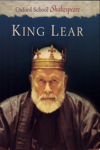

David Copperfield's Tales of the Impossible(1995, 385 pages): 0.5751422047615051


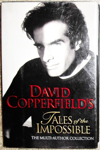

My Favorite Summer 1956(1991, 246 pages): 0.5666068196296692


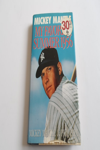

The Hobbit(1986, 320 pages): 0.5573791861534119


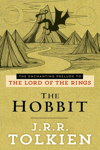

Watership Down(1975, 478 pages): 0.5462617874145508


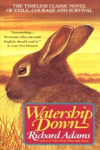

In [100]:
# Test the vector search with a text query
vector_search("A man wearing a golden crown", "text")

# Also try these text queries:
# - A rainbow of lively colors
# - Creatures wondrous or familiar
# - A boy and the ocean
# - Houses

My Favorite Summer 1956(1991, 246 pages): 0.6939573287963867


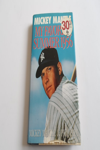

The Baseball Fan's Companion: How to Master the Subtleties of the World's Most Complex Team Sport and Learn to Watch the Game Like an Expert(1996, 272 pages): 0.6847946643829346


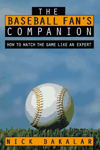

The Left-Hander Syndrome : The Causes & Consequences of Left Handedness(1992, 308 pages): 0.6305227279663086


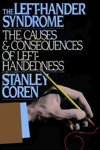

David Copperfield's Tales of the Impossible(1995, 385 pages): 0.6204563975334167


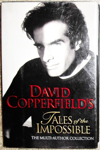

Fresh Ways with Salads:  As Side Dishes or Main Courses (Sunset)(1987, 96 pages): 0.6081113219261169


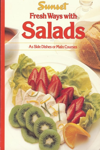

In [101]:
# Test the vector search with an image query
vector_search("https://images.isbndb.com/covers/10835953482746.jpg", "image")

# Also try these image queries:
# - ../data/images/salad.jpg
# - ../data/images/kitten.png
# - ../data/images/barn.png

# Step 7: Adding pre-filters to your vector search

### Filter for books that were published after the year `2002`

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#about-the-filter-type

In [102]:
# Modify the vector search index `model` from Step 5 to include the `year` field as a `filter` field
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 1024,
                "similarity": "cosine",
            },
            {"type": "filter", "path": "year"},
        ]
    },
}

In [103]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index
vector_index index already exists, recreating...
Dropping vector_index index
vector_index index deletion complete
Creating new vector_index index
Successfully recreated the vector_index index


In [104]:
# Use the `check_index_ready` function from the `utils` module to verify that the index has the right filter fields and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: PENDING
vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 1024, 'similarity': 'cosine'}, {'type': 'filter', 'path': 'year'}]}


📚 https://www.mongodb.com/docs/manual/reference/operator/query/gte/#syntax

Raising Blaze: A Mother and Son's Long, Strange Journey into Autism(2003, 316 pages): 0.5760033130645752


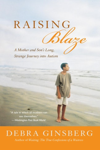

Secrets of the Tsil Café: A Novel with Recipes(2002, 304 pages): 0.5490971207618713


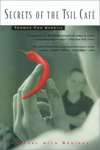

King Lear (Oxford School Shakespeare Series)(2002, 224 pages): 0.5484465956687927


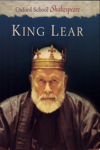

In [105]:
# Create a filter definition to filter for books where the `year` field is greater than `2002` using the `$gte` operator
filter = {"year": {"$gte": 2002}}
# Pass the `filter` as an argument to the `vector_search` function.
# Notice how this filter is incorporated in the `pipeline` in the `vector_search` function.
vector_search("A boy and the ocean", "text", filter)

### Filter for books that were published after the year `2002` and under `250` pages

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#about-the-filter-type

In [106]:
# Modify the vector search index `model` from Step 5 to include `year` and `pages` as filter fields
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 1024,
                "similarity": "cosine",
            },
            {"type": "filter", "path": "year"},
            {"type": "filter", "path": "pages"},
        ]
    },
}

In [107]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index
vector_index index already exists, recreating...
Dropping vector_index index
vector_index index deletion complete
Creating new vector_index index
Successfully recreated the vector_index index


In [108]:
# Use the `check_index_ready` function from the `utils` module to verify that the index has the right filter fields and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: PENDING
vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 1024, 'similarity': 'cosine'}, {'type': 'filter', 'path': 'year'}, {'type': 'filter', 'path': 'pages'}]}


📚 https://www.mongodb.com/docs/manual/reference/operator/query/lte/#mongodb-query-op.-lte

King Lear (Oxford School Shakespeare Series)(2002, 224 pages): 0.5484465956687927


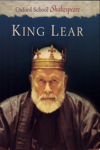

In [109]:
# Create a filter definition to filter for books where the `year` field is greater than or equal to `2002` and the `pages` field is less than or equal to 250
# Use the `$gte` and `$lte` operators
filter = {"$and": [{"year": {"$gte": 2002}}, {"pages": {"$lte": 250}}]}
# Pass the `filter` as an argument to the `vector_search` function.
# Notice how this filter is incorporated in the `pipeline` in the `vector_search` function.
vector_search("A boy and the ocean", "text", filter)

# Step 8: Enable vector quantization

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#syntax

In [110]:
# Modify the vector search index `model` from Step 5 to use `scalar` quantization
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 1024,
                "similarity": "cosine",
                "quantization": "scalar",
            },
        ]
    },
}

In [111]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index
vector_index index already exists, recreating...
Dropping vector_index index
vector_index index deletion complete
Creating new vector_index index
Successfully recreated the vector_index index


In [112]:
# Use the `check_index_ready` function from the `utils` module to verify the index was created with quantization enabled
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: PENDING
vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 1024, 'similarity': 'cosine', 'quantization': 'scalar'}]}


# 🦹‍♀️ Hybrid search

In [121]:
# Name of the full-text search index
ATLAS_FTS_INDEX_NAME = "fts_index"

In [122]:
# Create full-text search index definition specifying the field mappings
model = {
    "name": ATLAS_FTS_INDEX_NAME,
    "type": "search",
    "definition": {
        "mappings": {"dynamic": False, "fields": {"synopsis": {"type": "string"}}}
    },
}

In [123]:
# Use the `create_index` function from the `utils` module to create a full-text search index with the above definition for the `collection` collection
create_index(collection, ATLAS_FTS_INDEX_NAME, model)

Creating the fts_index index
fts_index index already exists, recreating...
Dropping fts_index index
fts_index index deletion complete
Creating new fts_index index
Successfully recreated the fts_index index


In [124]:
# Reset the vector search index to the original vector search index definition
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 1024,
                "similarity": "cosine",
            }
        ]
    },
}

# Use the `create_index` function from the `utils` module to reset the vector search index to its initial definition.
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index


In [125]:
# Use the `check_index_ready` function from the `utils` module to verify that both the indexes were created and are in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)
check_index_ready(collection, ATLAS_FTS_INDEX_NAME)

vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 1024, 'similarity': 'cosine'}]}
fts_index index status: READY
fts_index index definition: {'mappings': {'dynamic': False, 'fields': {'synopsis': {'type': 'string', 'indexOptions': 'offsets', 'store': True, 'norms': 'include'}}}}


**NOTE:** Refer to our [documentation](https://www.mongodb.com/docs/atlas/atlas-vector-search/tutorials/reciprocal-rank-fusion/#about-the-query) for a detailed explanation of the hybrid search query below.

In [126]:
def hybrid_search(
    user_query: str, vector_weight: float, full_text_weight: float
) -> None:
    """
    Retrieve relevant documents for a user query using hybrid search.

    Args:
        user_query (str): User query string
        vector_weight (float): Weight of vector search in the final search results
        full_text_weight (float): Weight of full-text search in the final search results
    """
    pipeline = [
        {
            "$rankFusion": {
                "input": {
                    "pipelines": {
                        "vector_pipeline": [
                            {
                                "$vectorSearch": {
                                    "index": ATLAS_VECTOR_SEARCH_INDEX_NAME,
                                    "path": "embedding",
                                    "queryVector": get_embeddings(user_query, "text", "query"),
                                    "numCandidates": 20,
                                    "limit": 10,
                                }
                            }
                        ],
                        "fts_pipeline": [
                            {
                                "$search": {
                                    "index": ATLAS_FTS_INDEX_NAME,
                                    "text": {"query": user_query, "path": "synopsis"},
                                }
                            },
                            {"$limit": 10},
                        ],
                    }
                },
                "combination": {
                    "weights": {"vector_pipeline": vector_weight, "fts_pipeline": full_text_weight}
                },
                "scoreDetails": True,
            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "cover": 1,
                "score": {"$getField": {"field": "value", "input": {"$meta": "scoreDetails"}}},
            }
        },
        {"$limit": 5},
    ]

    results = collection.aggregate(pipeline)
    # Print book title, scores, and cover image
    for book in results:
        cover = Image.open(requests.get(book["cover"], stream=True).raw).resize(
            (100, 150)
        )
        print(
            f"{book.get('title')}, Hybrid Search Score: {book.get('score')}"
        )
        display(cover)

The Hobbit, Hybrid Search Score: 0.01639344262295082


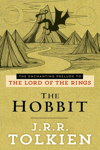

Dragon of the Lost Sea (Dragon Series), Hybrid Search Score: 0.016129032258064516


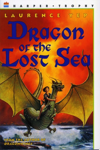

The Design of Everyday Things, Hybrid Search Score: 0.015873015873015872


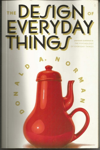

David Copperfield's Tales of the Impossible, Hybrid Search Score: 0.015625


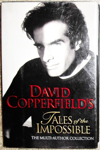

Sea Feather (An Avon Camelot Book), Hybrid Search Score: 0.015384615384615385


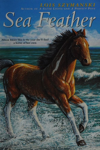

In [134]:
# Test the hybrid search query with a weight of 1.0 for vector search and 0.0 for full-text search
hybrid_search(
    user_query="Magic and fantasy",
    vector_weight=1.0,
    full_text_weight=0.0,
)

The Hobbit, Hybrid Search Score: 0.016208355367530406


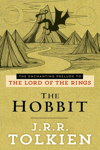

David Copperfield's Tales of the Impossible, Hybrid Search Score: 0.016162909836065574


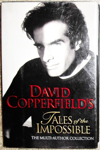

My Favorite Summer 1956, Hybrid Search Score: 0.015656565656565653


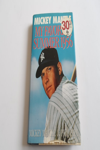

Secrets of the Tsil Café: A Novel with Recipes, Hybrid Search Score: 0.015246842709529276


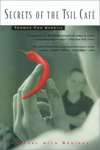

The Design of Everyday Things, Hybrid Search Score: 0.01520966595593461


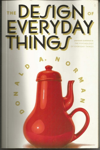

In [135]:
# Test the hybrid search query with a weight of 0.3 for vector search and 0.7 for full-text search
hybrid_search(
    user_query="Magic and fantasy",
    vector_weight=0.3,
    full_text_weight=0.7,
)